# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 4: Advanced Modelling

Author: Patrick Smith

Date: 09/04/2024

Contact: patrick.b.smith@gmail.com

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| General Region                 | Consolidated Region                                                        | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)


## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#see max columns
pd.options.display.max_columns = None

In [3]:
file_path = r'C:\Users\kamik\Downloads\df_model.csv'

df_model = pd.read_csv(file_path, low_memory=False)

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

In [4]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


In [5]:
df_model.head()

,Year,Quarter,Nationality,Region,Age,Sex,Case outcome,Decisions,Occupation,Industry,General_Region
0,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
1,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
2,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
3,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
4,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia


In [6]:
#df_model.duplicated().sum()

In [7]:
#df_model = df_model.drop_duplicates()

#print(f"We have {df_model.shape[0]} rows and {df_model.shape[1]} columns with string, floats and integers in our clean data.")

In [8]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Year            1301379 non-null  int64  
 1   Quarter         1301379 non-null  int64  
 2   Nationality     1301379 non-null  object 
 3   Region          1301379 non-null  object 
 4   Age             1301379 non-null  object 
 5   Sex             1301379 non-null  int64  
 6   Case outcome    1301379 non-null  object 
 7   Decisions       1301379 non-null  float64
 8   Occupation      1301379 non-null  object 
 9   Industry        1301379 non-null  object 
 10  General_Region  1301379 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 109.2+ MB


Making a df without nationality and occupation in case we need to. Unnecesary clutter. 

In [9]:
df_reduced = df_model.drop(['Nationality', 'Occupation', 'Industry', 'Region'], axis=1)

In [10]:
#df_reduced.duplicated().sum()

In [11]:
#df_reduced = df_reduced.drop_duplicates()

#print(f"We have {df_reduced.shape[0]} rows and {df_reduced.shape[1]} columns with string, floats and integers in our clean data for our df_reduced.")

In [12]:
df_reduced_nat = df_model.drop(['Occupation', 'Industry', 'General_Region', 'Region'], axis=1)

In [13]:
#df_reduced_nat = df_reduced_nat.drop_duplicates()

#print(f"We have {df_reduced_nat.shape[0]} rows and {df_reduced_nat.shape[1]} columns with string, floats and integers in our clean data for our df_reduced.")

In [14]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Year            1301379 non-null  int64  
 1   Quarter         1301379 non-null  int64  
 2   Age             1301379 non-null  object 
 3   Sex             1301379 non-null  int64  
 4   Case outcome    1301379 non-null  object 
 5   Decisions       1301379 non-null  float64
 6   General_Region  1301379 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 69.5+ MB


In [15]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Year          1301379 non-null  int64  
 1   Quarter       1301379 non-null  int64  
 2   Nationality   1301379 non-null  object 
 3   Age           1301379 non-null  object 
 4   Sex           1301379 non-null  int64  
 5   Case outcome  1301379 non-null  object 
 6   Decisions     1301379 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 69.5+ MB


df_reduced is 38% of df_model. good to know for encoding purposes

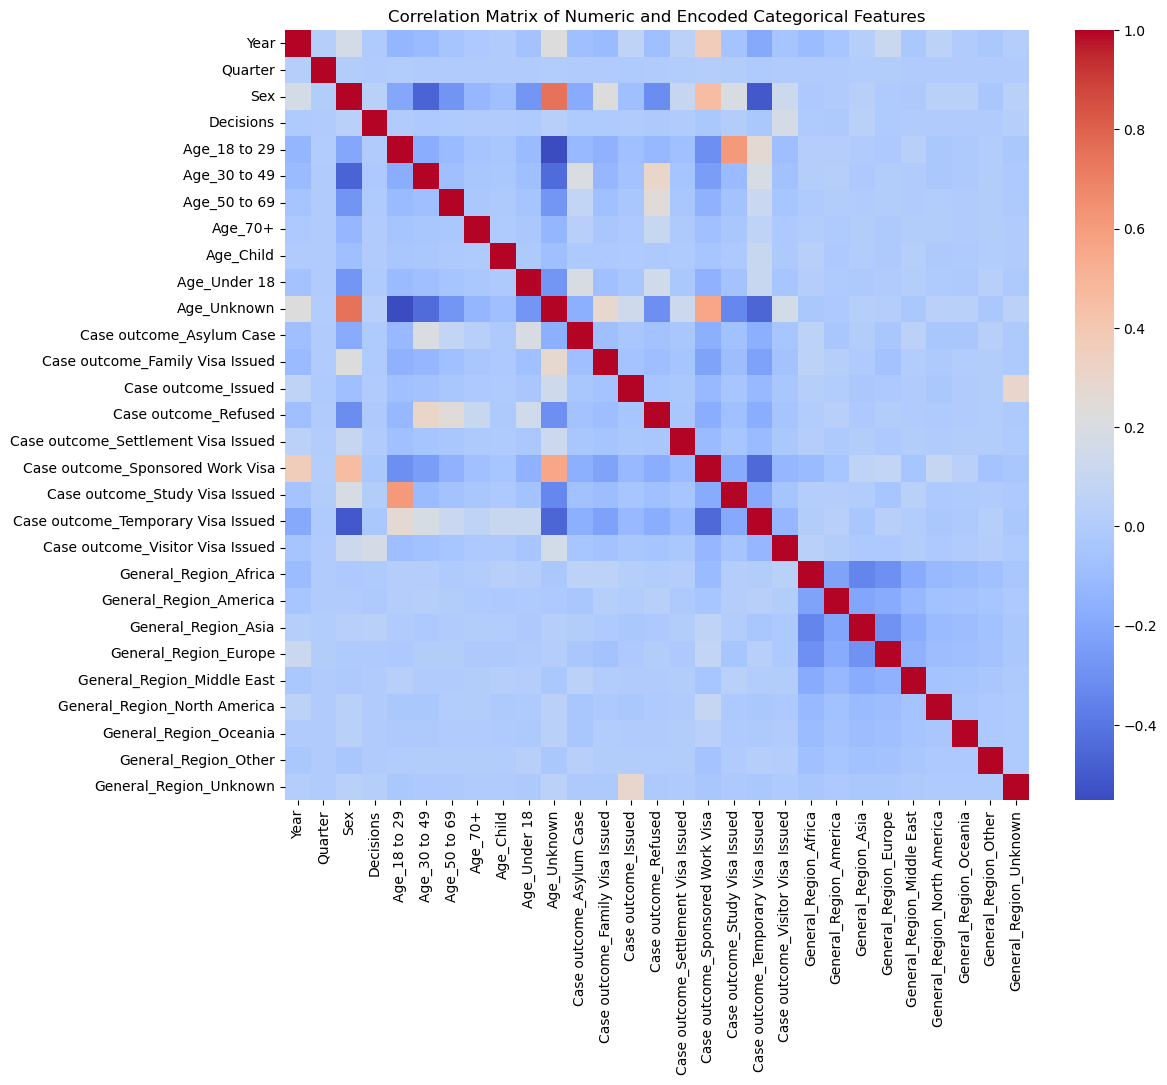

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced.select_dtypes(include=['object']).columns
df_reduced = pd.get_dummies(df_reduced, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix = df_reduced.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features')
plt.show()


Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

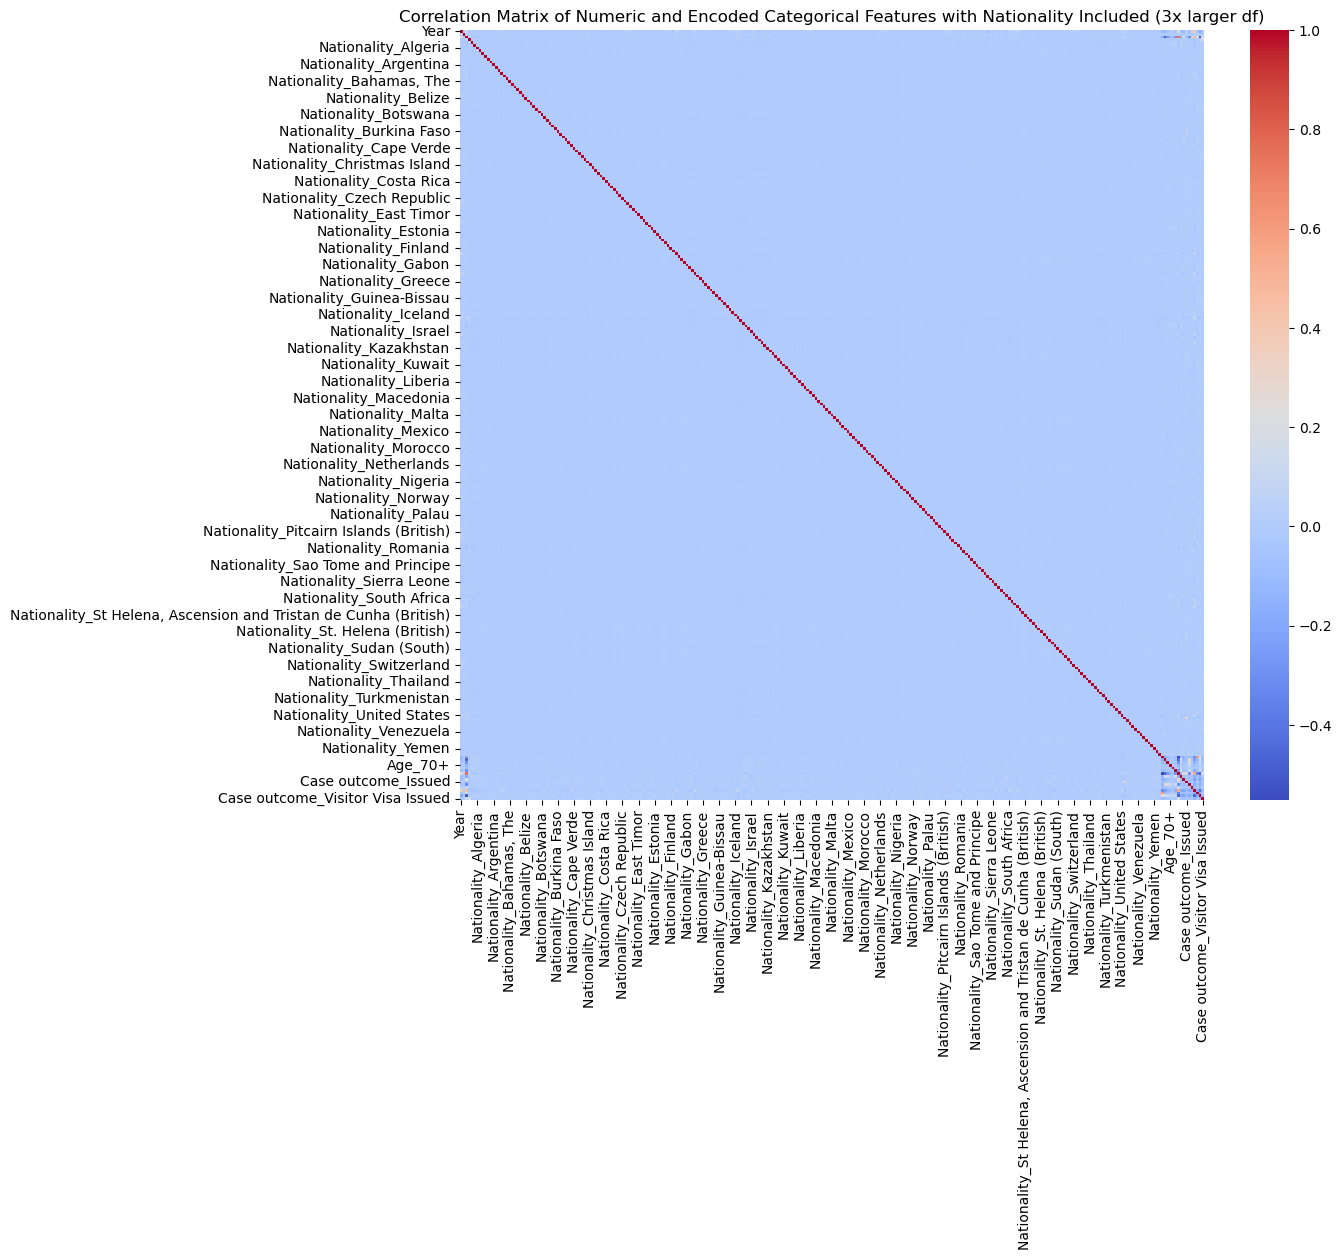

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced_nat.select_dtypes(include=['object']).columns
df_reduced_nat = pd.get_dummies(df_reduced_nat, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix2 = df_reduced_nat.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix2, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features with Nationality Included (3x larger df)')
plt.show()


In [18]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Data columns (total 29 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Year                                 1301379 non-null  int64  
 1   Quarter                              1301379 non-null  int64  
 2   Sex                                  1301379 non-null  int64  
 3   Decisions                            1301379 non-null  float64
 4   Age_18 to 29                         1301379 non-null  bool   
 5   Age_30 to 49                         1301379 non-null  bool   
 6   Age_50 to 69                         1301379 non-null  bool   
 7   Age_70+                              1301379 non-null  bool   
 8   Age_Child                            1301379 non-null  bool   
 9   Age_Under 18                         1301379 non-null  bool   
 10  Age_Unknown                          1301379 non-null  bool   
 11

In [19]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Columns: 277 entries, Year to Case outcome_Visitor Visa Issued
dtypes: bool(273), float64(1), int64(3)
memory usage: 378.5 MB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features: Drop all 'Case outcome_' columns to avoid data leakage, along with any other necessary adjustments
X = df_reduced.drop(columns=[col for col in df_reduced if col.startswith('Case outcome_')])
y = df_reduced['Case outcome_Refused']

# Followed by train_test_split, model fitting, and evaluation as previously shown

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9372012786426717

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97    243931
        True       0.00      0.00      0.00     16345

    accuracy                           0.94    260276
   macro avg       0.47      0.50      0.48    260276
weighted avg       0.88      0.94      0.91    260276



df_reduced_nat

In [21]:
# Define target variable explicitly before feature matrix to avoid it being dropped
y = df_reduced_nat['Case outcome_Refused'].copy()

# Drop 'Case outcome_' related columns to avoid data leakage
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9372012786426717

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97    243931
        True       0.00      0.00      0.00     16345

    accuracy                           0.94    260276
   macro avg       0.47      0.50      0.48    260276
weighted avg       0.88      0.94      0.91    260276



df_reduced

In [22]:
# Features: Drop all 'Case outcome_' columns to avoid data leakage, along with any other necessary adjustments
X = df_reduced.drop(columns=[col for col in df_reduced if col.startswith('Case outcome_')])

# Assuming 'Case outcome_Refused' is correctly set as y before splitting
# Ensure this line is correctly placed before defining X and y:
y = df_reduced['Case outcome_Study Visa Issued']

# Followed by train_test_split, model fitting, and evaluation as previously shown

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9986091687285804

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    241269
        True       0.98      1.00      0.99     19007

    accuracy                           1.00    260276
   macro avg       0.99      1.00      0.99    260276
weighted avg       1.00      1.00      1.00    260276



df_reduced_nat - seems to be working!

In [23]:

# Define target variable explicitly before feature matrix to avoid it being dropped
y = df_reduced_nat['Case outcome_Study Visa Issued'].copy()

# Drop 'Case outcome_' related columns to avoid data leakage
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9986091687285804

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    241269
        True       0.98      1.00      0.99     19007

    accuracy                           1.00    260276
   macro avg       0.99      1.00      0.99    260276
weighted avg       1.00      1.00      1.00    260276



continuing with df_reduced_nat because there's more variability. our targets are now Refused, study visa issued, and asylum case

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable: 1 for 'Refused' or 'Study Visa Issued', 0 otherwise
df_reduced_nat['Target'] = (df_reduced_nat['Case outcome_Refused'] | 
                            df_reduced_nat['Case outcome_Study Visa Issued'] | 
                            df_reduced_nat['Case outcome_Asylum Case']).astype(int)
# Target variable
y = df_reduced_nat['Target'].copy()

# Drop 'Case outcome_' related columns, including the new 'Target' column
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')] + ['Target'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Initialize a dictionary to store classification reports
classification_reports = {}

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Store the report using a descriptive key
classification_reports['Logistic Regression'] = report

# Print the accuracy and the classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Now, you can access the stored report for Logistic Regression like this:
# classification_reports['Logistic Regression']


Accuracy: 0.869081282945796

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92    210034
           1       0.67      0.64      0.65     50242

    accuracy                           0.87    260276
   macro avg       0.79      0.78      0.79    260276
weighted avg       0.87      0.87      0.87    260276



Suggests maybe an imbalance

In [25]:
classification_reports['Logistic Regression']

{'0': {'precision': 0.9142414554563132,
  'recall': 0.9244836550272812,
  'f1-score': 0.9193340293214588,
  'support': 210034},
 '1': {'precision': 0.6687965921192758,
  'recall': 0.6374746228255245,
  'f1-score': 0.6527600860074797,
  'support': 50242},
 'accuracy': 0.869081282945796,
 'macro avg': {'precision': 0.7915190237877945,
  'recall': 0.7809791389264029,
  'f1-score': 0.7860470576644693,
  'support': 260276},
 'weighted avg': {'precision': 0.8668623624020959,
  'recall': 0.869081282945796,
  'f1-score': 0.867876314972149,
  'support': 260276}}

OK moving on to decision tree classifier

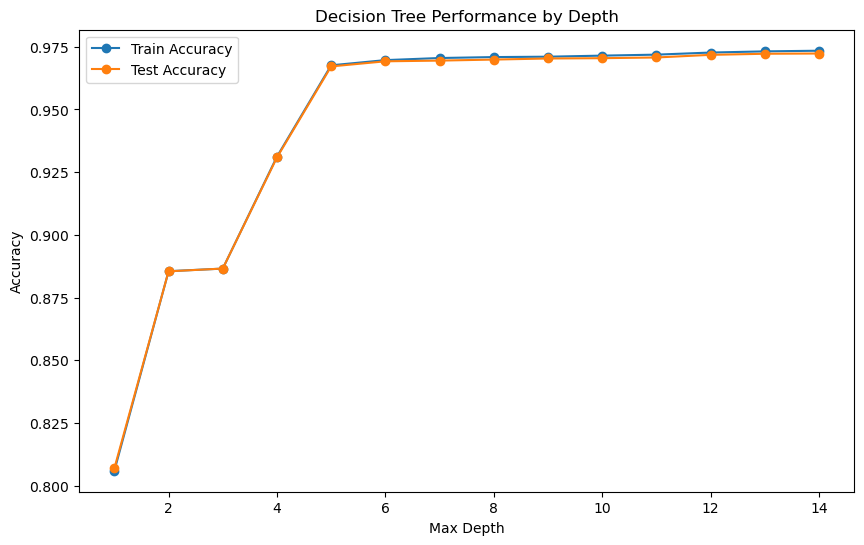


Classification Report for chosen depth (Depth 5):
               precision    recall  f1-score        support
0              0.966234  0.994025  0.979932  210034.000000
1              0.971607  0.854783  0.909459   50242.000000
accuracy       0.967146  0.967146  0.967146       0.967146
macro avg      0.968920  0.924404  0.944695  260276.000000
weighted avg   0.967271  0.967146  0.966329  260276.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_reduced_nat is already defined and prepared

# Step 1: Create the binary target variable
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store classification reports for each depth
classification_reports = {}

# Initialize lists to store accuracies for the non-scaled features
train_accs, test_accs = [], []

depth_values = range(1, 15)

# Step 4: Train and evaluate Decision Tree model over different depths
for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_accs.append(dt.score(X_train, y_train))
    test_accs.append(dt.score(X_test, y_test))
    
    # Predicting the target variable for the testing set at current depth
    y_pred = dt.predict(X_test)
    
    # Evaluating the model and storing the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[f'Depth {d}'] = report

# Plotting the performance
plt.figure(figsize=(10, 6))

# Data Plot for Accuracy by Depth
plt.plot(depth_values, train_accs, label='Train Accuracy', marker='o')
plt.plot(depth_values, test_accs, label='Test Accuracy', marker='o')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance by Depth')

plt.show()

# Optional: Choose a depth based on the plots and print classification report
chosen_depth = 5  # Example, adjust based on observation
print("\nClassification Report for chosen depth (Depth 5):\n", pd.DataFrame(classification_reports[f'Depth {chosen_depth}']).transpose())

# Now, you can access and compare the stored reports for each depth from `classification_reports`


In [27]:
# To access and print the classification report for the Decision Tree model at depth 5
report_depth_5 = classification_reports['Depth 5']

# Printing the report
print("Classification Report for Depth 5:")
print(pd.DataFrame(report_depth_5).transpose())


Classification Report for Depth 5:
              precision    recall  f1-score        support
0              0.966234  0.994025  0.979932  210034.000000
1              0.971607  0.854783  0.909459   50242.000000
accuracy       0.967146  0.967146  0.967146       0.967146
macro avg      0.968920  0.924404  0.944695  260276.000000
weighted avg   0.967271  0.967146  0.966329  260276.000000


Now we're focused on Advanced modelling

We will:

1) Prepare the data
2) Spilt the data to training and testing sets
3) Initialize the model 
4) Fit the model
5) Evaluate

In [28]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301379 entries, 0 to 1301378
Columns: 278 entries, Year to Target
dtypes: bool(273), float64(1), int32(1), int64(3)
memory usage: 383.5 MB


In [29]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_reduced_nat is already defined and loaded

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize a dictionary to store classification reports
classification_reports = {}

# Define a list or dictionary of models if you're planning to evaluate multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for model_name, model in models.items():
    # Create a pipeline that includes the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the report in the dictionary
    classification_reports[model_name] = report
    
    # Optionally, print the model's name and its accuracy
    print(f"Model: {model_name}, Accuracy: {accuracy}")

# At this point, you have all your reports stored in classification_reports
# You can access a specific report with classification_reports['Decision Tree']


Model: Decision Tree, Accuracy: 0.8541509781923804


In [31]:
# Access and print the classification report for the Decision Tree model
decision_tree_report = classification_reports['Decision Tree']
print("Classification Report for Decision Tree:")
print(pd.DataFrame(decision_tree_report).transpose())


Classification Report for Decision Tree:
              precision    recall  f1-score        support
0              0.883901  0.943143  0.912561  210034.000000
1              0.669791  0.482127  0.560672   50242.000000
accuracy       0.854151  0.854151  0.854151       0.854151
macro avg      0.776846  0.712635  0.736617  260276.000000
weighted avg   0.842571  0.854151  0.844635  260276.000000


DecisionTreeClassifier is a great way to fine-tune your model by searching through a predefined grid of hyperparameters. This approach will help you identify the best combination of parameters for your model based on the specified scoring metric, which in this case is f1_weighted. This scoring metric is particularly useful for imbalanced classes because it weights the F1 score of each class by the number of true instances, then takes the average.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_reduced_nat is already defined and loaded

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features from the selected features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ])

# Define the pipeline with the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

# Initialize a dictionary to store classification reports
classification_reports = {}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 weighted score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 weighted score found:", grid_search.best_score_)

# Make predictions using the model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Generate and store the classification report for the model found by GridSearchCV
dt_gridsearchcv_report = classification_report(y_test, y_pred, output_dict=True)

# Storing the classification report in the classification_reports dictionary
classification_reports['Decision Tree GridSearchCV'] = dt_gridsearchcv_report

# Optionally, print the classification report for GridSearchCV
print("\nClassification Report for Decision Tree GridSearchCV:")
print(pd.DataFrame(classification_reports['Decision Tree GridSearchCV']).transpose())


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best F1 weighted score found: 0.847764853159094

Classification Report for Decision Tree GridSearchCV:
              precision    recall  f1-score        support
0              0.882410  0.952403  0.916071  210034.000000
1              0.702311  0.469428  0.562727   50242.000000
accuracy       0.859173  0.859173  0.859173       0.859173
macro avg      0.792360  0.710915  0.739399  260276.000000
weighted avg   0.847645  0.859173  0.847864  260276.000000


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Assuming df_reduced_nat is already defined and loaded
# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the pipeline with the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': np.arange(3, 20),
    'classifier__min_samples_split': np.arange(2, 11),
    'classifier__class_weight': [None, 'balanced']
}

# Initialize a dictionary to store classification reports
classification_reports = {}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='f1_weighted', verbose=1, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best F1 weighted score
print("Best parameters found:", random_search.best_params_)
print("Best F1 weighted score found:", random_search.best_score_)

# Make predictions using the model found by RandomizedSearchCV
y_pred = random_search.predict(X_test)

# Generate and store the classification report for the model found by RandomizedSearchCV
dt_randomsearchcv_report = classification_report(y_test, y_pred, output_dict=True)

# Storing the classification report in the classification_reports dictionary
classification_reports['Decision Tree RandomizedSearchCV'] = dt_randomsearchcv_report

# Optionally, print the classification report for RandomizedSearchCV
print("\nClassification Report for Decision Tree RandomizedSearchCV:")
print(pd.DataFrame(classification_reports['Decision Tree RandomizedSearchCV']).transpose())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'classifier__min_samples_split': 8, 'classifier__max_depth': 9, 'classifier__class_weight': None}
Best F1 weighted score found: 0.8477323016352745

Classification Report for Decision Tree RandomizedSearchCV:
              precision    recall  f1-score        support
0              0.882391  0.952446  0.916081  210034.000000
1              0.702446  0.469309  0.562684   50242.000000
accuracy       0.859184  0.859184  0.859184       0.859184
macro avg      0.792418  0.710877  0.739383  260276.000000
weighted avg   0.847656  0.859184  0.847864  260276.000000


In [34]:
df_reduced_nat.columns

Index(['Year', 'Quarter', 'Sex', 'Decisions', 'Nationality_Afghanistan',
       'Nationality_Albania', 'Nationality_Algeria',
       'Nationality_American Samoa (United States)', 'Nationality_Andorra',
       'Nationality_Angola',
       ...
       'Case outcome_Asylum Case', 'Case outcome_Family Visa Issued',
       'Case outcome_Issued', 'Case outcome_Refused',
       'Case outcome_Settlement Visa Issued',
       'Case outcome_Sponsored Work Visa', 'Case outcome_Study Visa Issued',
       'Case outcome_Temporary Visa Issued',
       'Case outcome_Visitor Visa Issued', 'Target'],
      dtype='object', length=278)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import pandas as pd
from tempfile import mkdtemp
from shutil import rmtree

# Assuming df_reduced_nat is already defined and loaded
# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features from the selected features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ])

cachedir = mkdtemp()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
], memory=cachedir)

param_distributions = {
    'classifier__max_depth': [None, 10],  # Simplified to two options
    'classifier__min_samples_leaf': [1, 2],  # Reduced options
    'classifier__min_samples_split': [2, 5],  # Reduced options
    'classifier__n_estimators': [50]  # Only using 50 estimators for quicker computation
}

random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,  # Further reduced the number of iterations for quicker execution
    cv=3,  # Using fewer folds for cross-validation to speed up
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)

print("Best Parameters:", random_search_rf.best_params_)
print("Best CV Score:", random_search_rf.best_score_)

best_model_report_rf = classification_report(y_test, random_search_rf.predict(X_test), output_dict=True)
classification_reports = {}  # Ensure this is defined
classification_reports['Random Forest with RandomizedSearchCV'] = best_model_report_rf

rmtree(cachedir)

# Printing the classification report for Random Forest with RandomizedSearchCV
print(classification_reports['Random Forest with RandomizedSearchCV'])


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
Best CV Score: 0.8590466074447299
{'0': {'precision': 0.8820812102191583, 'recall': 0.9527790738642316, 'f1-score': 0.9160681342726744, 'support': 210034}, '1': {'precision': 0.703125, 'recall': 0.46753712033756617, 'f1-score': 0.5616258218768678, 'support': 50242}, 'accuracy': 0.8591110974503988, 'macro avg': {'precision': 0.7926031051095792, 'recall': 0.7101580971008988, 'f1-score': 0.7388469780747711, 'support': 260276}, 'weighted avg': {'precision': 0.8475366578446368, 'recall': 0.8591110974503988, 'f1-score': 0.847648876794497, 'support': 260276}}


In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Define the binary target variable and the features as specified
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Define features, excluding 'Case outcome_' related columns, and the new 'Target' column
features = [col for col in df_reduced_nat.columns if col not in ['Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
classification_report_xgb = classification_report(y_test, y_pred, output_dict=True)

# Store the classification report in the classification_reports dictionary
classification_reports['XGBoost'] = classification_report_xgb

# Optionally, print the classification report for XGBoost
print("\nClassification Report for XGBoost:")
print(pd.DataFrame(classification_reports['XGBoost']).transpose())



Classification Report for XGBoost:
              precision    recall  f1-score        support
0              0.977627  0.992401  0.984959  210034.000000
1              0.966092  0.905060  0.934580   50242.000000
accuracy       0.975541  0.975541  0.975541       0.975541
macro avg      0.971860  0.948730  0.959770  260276.000000
weighted avg   0.975401  0.975541  0.975234  260276.000000


In [ ]:
DONT RUN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd

# Assuming df_reduced_nat is preprocessed

# Define X and y
X = df_reduced_nat.drop('Target', axis=1)
y = df_reduced_nat['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling (assuming it's beneficial for your dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setup the SVM model
model = SVC(random_state=42)

# Define parameter grid
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Setup RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5,  # Reduced iterations
    cv=3,  # Fewer folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_svm.fit(X_train_scaled, y_train)

# Output and evaluation
print("Best Parameters:", random_search_svm.best_params_)
print("Best CV Score:", random_search_svm.best_score_)
best_model_report_svm = classification_report(y_test, random_search_svm.predict(X_test_scaled), output_dict=True)
print(pd.DataFrame(best_model_report_svm).transpose())


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [37]:
import pandas as pd

# Assuming classification_reports is your dictionary containing classification reports
for model_name, report in classification_reports.items():
    print(f"Classification Report for {model_name}:")
    report_df = pd.DataFrame(report).transpose()  # Convert the classification report to a DataFrame
    print(report_df, "\n")  # Print the DataFrame


Classification Report for Decision Tree RandomizedSearchCV:
              precision    recall  f1-score        support
0              0.882391  0.952446  0.916081  210034.000000
1              0.702446  0.469309  0.562684   50242.000000
accuracy       0.859184  0.859184  0.859184       0.859184
macro avg      0.792418  0.710877  0.739383  260276.000000
weighted avg   0.847656  0.859184  0.847864  260276.000000 



In [40]:
# Accessing and converting a specific model's classification report to DataFrame
model_name = 'XGBoost'  # Change this to your model's name as stored in the dictionary
if model_name in classification_reports:
    report_df = pd.DataFrame(classification_reports[model_name]).transpose()
    print(f"Classification Report for {model_name}:")
    print(report_df)
else:
    print(f"Classification report for {model_name} not found.")


Classification Report for XGBoost:
              precision    recall  f1-score        support
0              0.977627  0.992401  0.984959  210034.000000
1              0.966092  0.905060  0.934580   50242.000000
accuracy       0.975541  0.975541  0.975541       0.975541
macro avg      0.971860  0.948730  0.959770  260276.000000
weighted avg   0.975401  0.975541  0.975234  260276.000000


In [41]:
# Accessing and converting a specific model's classification report to DataFrame
model_name = 'Decision Tree RandomizedSearchCV'  # Change this to your model's name as stored in the dictionary
if model_name in classification_reports:
    report_df = pd.DataFrame(classification_reports[model_name]).transpose()
    print(f"Classification Report for {model_name}:")
    print(report_df)
else:
    print(f"Classification report for {model_name} not found.")


Classification Report for Decision Tree RandomizedSearchCV:
              precision    recall  f1-score        support
0              0.882391  0.952446  0.916081  210034.000000
1              0.702446  0.469309  0.562684   50242.000000
accuracy       0.859184  0.859184  0.859184       0.859184
macro avg      0.792418  0.710877  0.739383  260276.000000
weighted avg   0.847656  0.859184  0.847864  260276.000000


In [47]:
# Accessing and converting a specific model's classification report to DataFrame
model_name = 'Random Forest with RandomizedSearchCV'  # Change this to your model's name as stored in the dictionary
if model_name in classification_reports:
    report_df = pd.DataFrame(classification_reports[model_name]).transpose()
    print(f"Classification Report for {model_name}:")
    print(report_df)
else:
    print(f"Classification report for {model_name} not found.")


Classification report for Random Forest with RandomizedSearchCV not found.


In [48]:
# Assuming `report_df` is your DataFrame from the previous step
excel_filename = "classification_report.xlsx"
report_df.to_excel(excel_filename, sheet_name='Report')

print(f"Classification report has been saved to {excel_filename}")


Classification report has been saved to classification_report.xlsx
